In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 18.png to 18.png
Saving 19.png to 19.png
Saving 24.png to 24.png
Saving 25.png to 25.png
Saving 8.png to 8.png
Saving 9.png to 9.png
Saving 10.png to 10.png
Saving 11.png to 11.png
Saving 12.png to 12.png
Saving 13.png to 13.png
Saving 14.png to 14.png
Saving 15.png to 15.png
Saving 16.png to 16.png
Saving 17.png to 17.png
Saving 20.png to 20.png
Saving 21.png to 21.png
Saving 22.png to 22.png
Saving 23.png to 23.png
Saving 26.png to 26.png
Saving 27.png to 27.png
Saving 28.png to 28.png


In [6]:
!pip install scikit-image matplotlib --quiet


In [12]:
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.restoration import denoise_bilateral
from skimage.exposure import equalize_adapthist
from skimage.util import img_as_ubyte

In [13]:
from skimage import io

images = []
for i in range(1, 29):
    filename = f'{i}.png'
    img = io.imread(filename)
    images.append(img)

In [14]:
processed_images = []

In [15]:
for img in images:
    if img.ndim == 3:
        img = rgb2gray(img)

    img = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, channel_axis=None)
    img = equalize_adapthist(img, clip_limit=0.03)

    processed_images.append(img)

print(" Preprocessing complete.")

 Preprocessing complete.


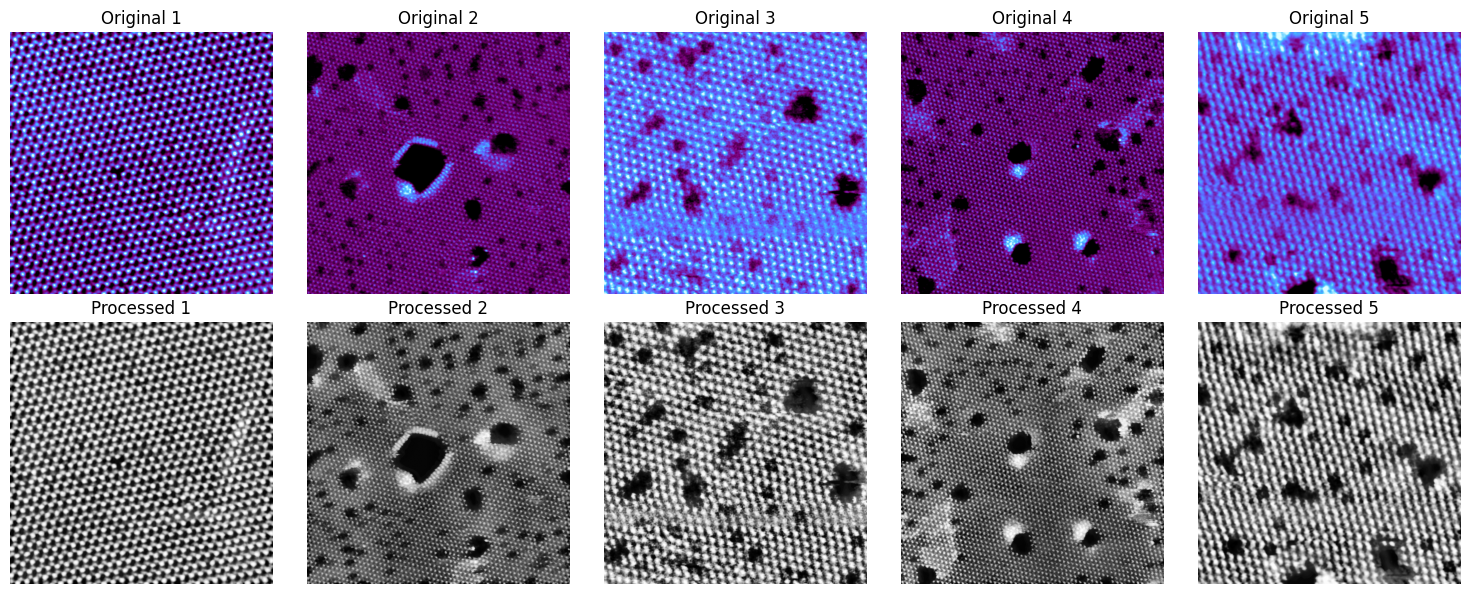

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    ax[0, i].imshow(images[i], cmap='gray')
    ax[0, i].set_title(f'Original {i+1}')
    ax[0, i].axis('off')

    ax[1, i].imshow(processed_images[i], cmap='gray')
    ax[1, i].set_title(f'Processed {i+1}')
    ax[1, i].axis('off')

plt.tight_layout()
plt.show()

In [18]:
output_dir = 'processed'
os.makedirs(output_dir, exist_ok=True)

for i, img in enumerate(processed_images, 1):
    save_path = os.path.join(output_dir, f'{i}_processed.png')
    io.imsave(save_path, img_as_ubyte(img))


In [19]:
import shutil
shutil.make_archive('processed_images', 'zip', output_dir)
files.download('processed_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>